In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import *
from idea import dynamic_IDEA

EXPERIMENT_ID = 7
TRIAL_ID = 0

W tym eksperymencie testowałem prosty labirynt.

In [5]:
%%time
random_state(f"rng_states/experiment{EXPERIMENT_ID}.npy")

S = [0.7] * 70
d = len(S)
x_min = -np.pi
x_max = np.pi
T = 1

rectangle_lists = [[
    ((-2, -2), (5, -1)), ((-3, -2), (-2, 8)), ((-3, 8), (6, 9)), ((5, -2), (6, 8)),
    ((-2, 3), (4, 4)), ((3, 4), (4, 7))
]]
targets = [(2, 5)]
objective = dynamic_inverse_kinematics_objectives(S, targets, rectangle_lists)
n_constraints = len(rectangle_lists[0])

n = 2000
alpha_inf = 0.9
n_immigrants = 0
eta_c = 3.
eta_m = 15.
p_c = 0.9
p_m = 0.03
num_iterations_init = 600
num_iterations = 160

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, alpha_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=20)
TRIAL_ID = 1
np.savez(f"/tmp/histories/experiment{EXPERIMENT_ID}_{TRIAL_ID}", populations=population_hist, scores=score_hist)

t=0


/home/i291318/Dynamic-inverse-kinematics/simulation.py:34: RuntimeWarning: divide by zero encountered in true_divide
  t = _vector_product(x2 - x1, d2) / rs
/home/i291318/Dynamic-inverse-kinematics/simulation.py:35: RuntimeWarning: divide by zero encountered in true_divide
  u = _vector_product(x2 - x1, d1) / rs


Iteration 0, #feasible: 14, best: [6.78762205], #infeasible: 1986, best: [1.31920737e-03 9.00000000e+00]
Iteration 20, #feasible: 200, best: [4.44118096], #infeasible: 1800, best: [5.60893299e-04 1.00000000e+00]
Iteration 40, #feasible: 200, best: [4.44118096], #infeasible: 1800, best: [5.60893299e-04 1.00000000e+00]
Iteration 60, #feasible: 200, best: [4.44118096], #infeasible: 1800, best: [5.60893299e-04 1.00000000e+00]
Iteration 80, #feasible: 200, best: [4.16833424], #infeasible: 1800, best: [5.60893299e-04 1.00000000e+00]
Iteration 100, #feasible: 200, best: [4.16833424], #infeasible: 1800, best: [5.60893299e-04 1.00000000e+00]
Iteration 120, #feasible: 200, best: [4.03150824], #infeasible: 1800, best: [4.28558127e-04 1.00000000e+00]
Iteration 140, #feasible: 200, best: [4.03150824], #infeasible: 1800, best: [4.28558127e-04 1.00000000e+00]
Iteration 160, #feasible: 200, best: [4.03150824], #infeasible: 1800, best: [4.28558127e-04 1.00000000e+00]
Iteration 180, #feasible: 200, best

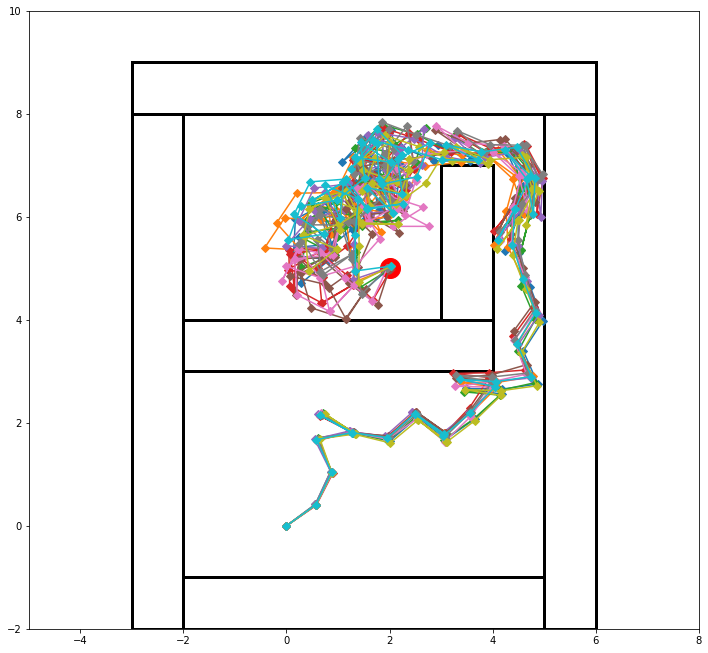

In [6]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    best = np.argsort(scores[-1, mask, 0])[:10]
    feasible_populations.append(feasible_population[best])
    
draw_dynamic_solutions(feasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=1, ncols=1, figsize=(12, 12), xlim=(-5, 8), ylim=(-2, 10), squeeze=False)

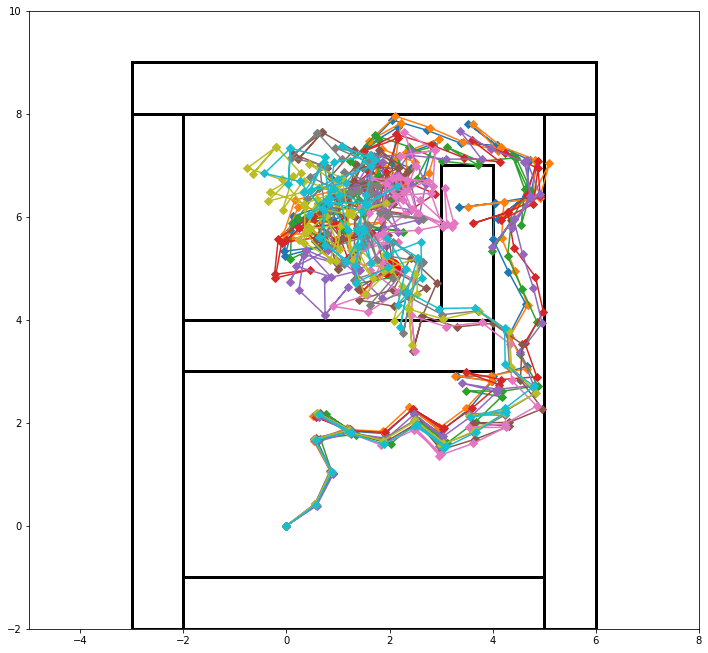

In [7]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population[::sum(~mask) // 10])
    
draw_dynamic_solutions(infeasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=1, ncols=1, figsize=(12, 12), xlim=(-5, 8), ylim=(-2, 10), squeeze=False)